<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/Lec10(2025_6_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
x = c(0.1, 0.1, 0.15, 0.6, 0.8, 0.8, 1.2, 2.5, 3, 4,
4, 6, 10, 10, 12.5, 20, 20, 43, 43, 48,
48, 54, 74, 84, 94, 168, 263, 593)
d1 = data.frame(t = x, cens = rep(1, length(x)))
d0 = data.frame(t = rep(1370, 4128), cens = rep(0, 4128))
d = rbind(d1, d0)

In [24]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
loglikelihood = function(t, delta){
  function(par){
    sum(log(L_i(t, delta, par)))
  }
}
L_i = function(t, delta, par){
  mu = par[1]
  sigma = par[2]
  pu = par[3]
  (pu * dsev( (log(t)-mu)/sigma ) / ( sigma*t ) )^delta * (1 - pu * psev( (log(t)-mu)/sigma ) )^(1-delta)
}

In [25]:
res = optim(
  c(3, 2, .05),
  loglikelihood(d$t, d$cens),
  hessian=TRUE,
  control=list(fnscale=-1)
)

Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”


In [26]:
hat.theta = res$par
H_n = res$hessian
fisher.information = -H_n
aVar = solve(fisher.information)

In [27]:
hat.theta

[1] 3.345008173 2.017241966 0.006748927

In [28]:
data.frame(
  lower = hat.theta[1] - qnorm(0.975)*sqrt(aVar[1,1]),
  upper = hat.theta[1] + qnorm(0.975)*sqrt(aVar[1,1])
)
# lower upper
# 2.548457 4.14156
data.frame(
  lower = hat.theta[2] - qnorm(0.975)*sqrt(aVar[2,2]),
  upper = hat.theta[2] + qnorm(0.975)*sqrt(aVar[2,2])
)
# lower upper
# 1.418893 2.615591
data.frame(
  lower = hat.theta[3] - qnorm(0.975)*sqrt(aVar[3,3]),
  upper = hat.theta[3] + qnorm(0.975)*sqrt(aVar[3,3])
)
# lower upper
# 0.004313218 0.009184637

lower,upper
<dbl>,<dbl>
2.548457,4.14156


lower,upper
<dbl>,<dbl>
1.418893,2.615591


lower,upper
<dbl>,<dbl>
0.004313218,0.009184637


In [29]:
mu = hat.theta[1]
sigma = hat.theta[2]
pu = hat.theta[3]
Gt = function(t, par){
  mu = par[1]
  sigma = par[2]
  pu = par[3]
  pu * psev( (log(t)-mu)/sigma )
}

# t = seq(0, 1500, len=100)
t = exp(seq(log(0.01), log(1500), len=100))
hat.G = Gt(t, c(mu, sigma, pu))
Jacobian = function(t, mu, sigma, pu, h = 0.00001){
  j1 = (Gt(t, c(mu-h, sigma, pu)) - Gt(t, c(mu+h, sigma, pu)))/(2*h)
  j2 = (Gt(t, c(mu, sigma-h, pu)) - Gt(t, c(mu, sigma+h, pu)))/(2*h)
  j3 = (Gt(t, c(mu, sigma, pu-h)) - Gt(t, c(mu, sigma, pu+h)))/(2*h)
  matrix(c(j1, j2, j3), ncol=3)
}
J = Jacobian(t, mu, sigma, pu)
tJ = t(J)
var.G = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
var.G

[1] 8.228652e-09 9.032878e-09 9.911998e-09 1.087249e-08 1.192132e-08
  [6] 1.306598e-08 1.431451e-08 1.567552e-08 1.715822e-08 1.877248e-08
 [11] 2.052880e-08 2.243837e-08 2.451309e-08 2.676557e-08 2.920919e-08
 [16] 3.185806e-08 3.472707e-08 3.783186e-08 4.118885e-08 4.481522e-08
 [21] 4.872887e-08 5.294841e-08 5.749314e-08 6.238298e-08 6.763843e-08
 [26] 7.328046e-08 7.933051e-08 8.581029e-08 9.274179e-08 1.001471e-07
 [31] 1.080481e-07 1.164669e-07 1.254250e-07 1.349435e-07 1.450429e-07
 [36] 1.557431e-07 1.670629e-07 1.790202e-07 1.916320e-07 2.049137e-07
 [41] 2.188797e-07 2.335434e-07 2.489167e-07 2.650105e-07 2.818350e-07
 [46] 2.993997e-07 3.177136e-07 3.367858e-07 3.566257e-07 3.772437e-07
 [51] 3.986513e-07 4.208616e-07 4.438899e-07 4.677535e-07 4.924721e-07
 [56] 5.180675e-07 5.445630e-07 5.719827e-07 6.003502e-07 6.296868e-07
 [61] 6.600091e-07 6.913267e-07 7.236386e-07 7.569298e-07 7.911674e-07
 [66] 8.262972e-07 8.622397e-07 8.988876e-07 9.361036e-07 9.737194e-07
 [71] 1.011537e-06 1.049331e-06 1.086853e-06 1.123839e-06 1.160018e-06
 [76] 1.195121e-06 1.228892e-06 1.261100e-06 1.291548e-06 1.320080e-06
 [81] 1.346589e-06 1.371018e-06 1.393357e-06 1.413641e-06 1.431942e-06
 [86] 1.448359e-06 1.463005e-06 1.476003e-06 1.487472e-06 1.497529e-06
 [91] 1.506279e-06 1.513819e-06 1.520242e-06 1.525638e-06 1.530097e-06
 [96] 1.533715e-06 1.536589e-06 1.538821e-06 1.540511e-06 1.541757e-06

In [30]:
kaplan.meier = function(d){
  d$nj = rev(seq_along(d$t))
  d.obs = d %>% filter(cens==1)
  d.obs = d.obs %>%
    mutate(p = (1)/nj) %>%
    mutate(q = 1-p) %>%
    mutate(SF = cumprod(q)) %>%
    mutate(CDF = 1-SF)
  d.obs
}
km.d = kaplan.meier(d)

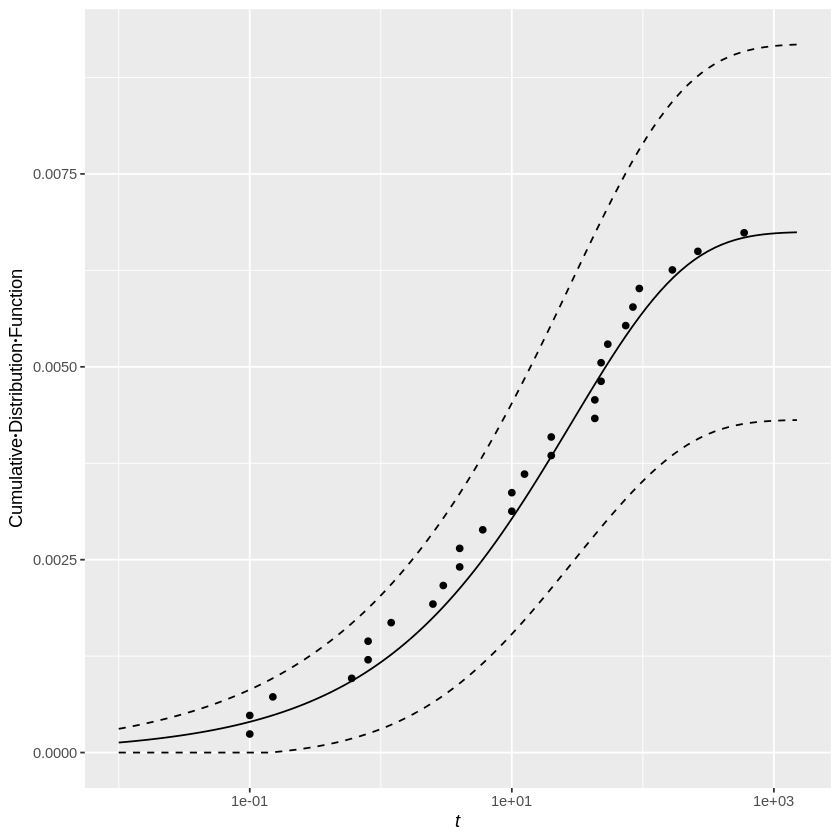

In [32]:
library(tidyverse)
dGT = data.frame(
  t,
  mean=hat.G,
  upper=hat.G+qnorm(0.975)*sqrt(var.G),
  lower=hat.G-qnorm(0.975)*sqrt(var.G))
dGT = dGT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
plot = dGT %>%
  ggplot()+
  geom_point(data = km.d, aes(t, CDF)) +
  geom_line(aes(t, mean))+
  geom_line(aes(t, upper), linetype=2)+
  geom_line(aes(t, lower), linetype=2)+
  xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
  scale_x_log10()
plot